# Milk adulteration

load dataset from adulteration.CSV
X.shape (500, 1300)  y.shape (500,)


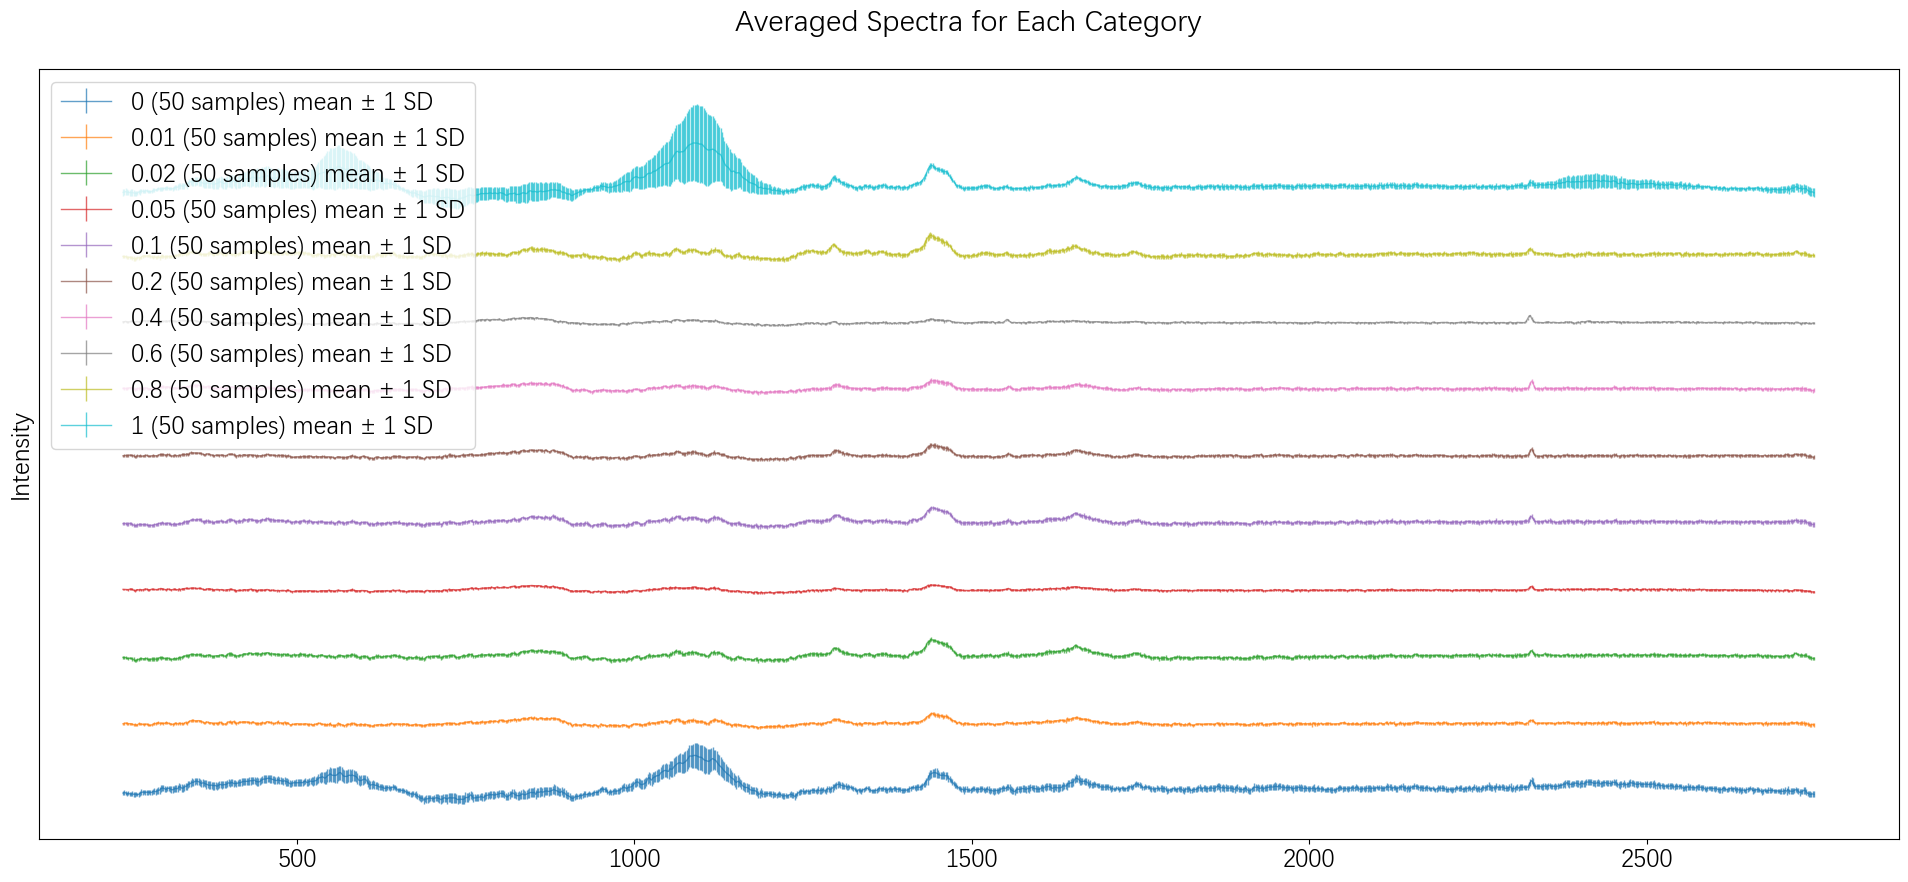

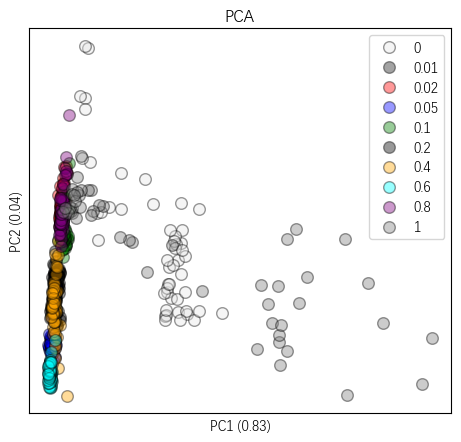

羊奶掺杂不同比例牛奶的拉曼光谱

yangniu0% label=0
yangniu1% label=1
yangniu2% label=2
yangniu5% label=3
yangniu10% label=4
yangniu20% label=5
yangniu40% label=6
yangniu60% label=7
yangniu80% label=8
yangniu100% label=9

"Goat milk is higher in fat and calories when compared to cow milk, and it also contains more protein, vitamins and minerals. 
When compared, goat milk also has about 1% less lactose than cow milk."
goats' milk is almost five times as expensive as cows' milk.  

The goat milk is from M company (Mengyang) and the cow milk is from T company (Telunsu).
No module named 'rpy2'


窗函数预处理（max）: binning window width =  1 / 0.2 = 5


消除基线飘移: baseline removal (regularization = 10000000.0, residual penalty asymetry = 0.01)


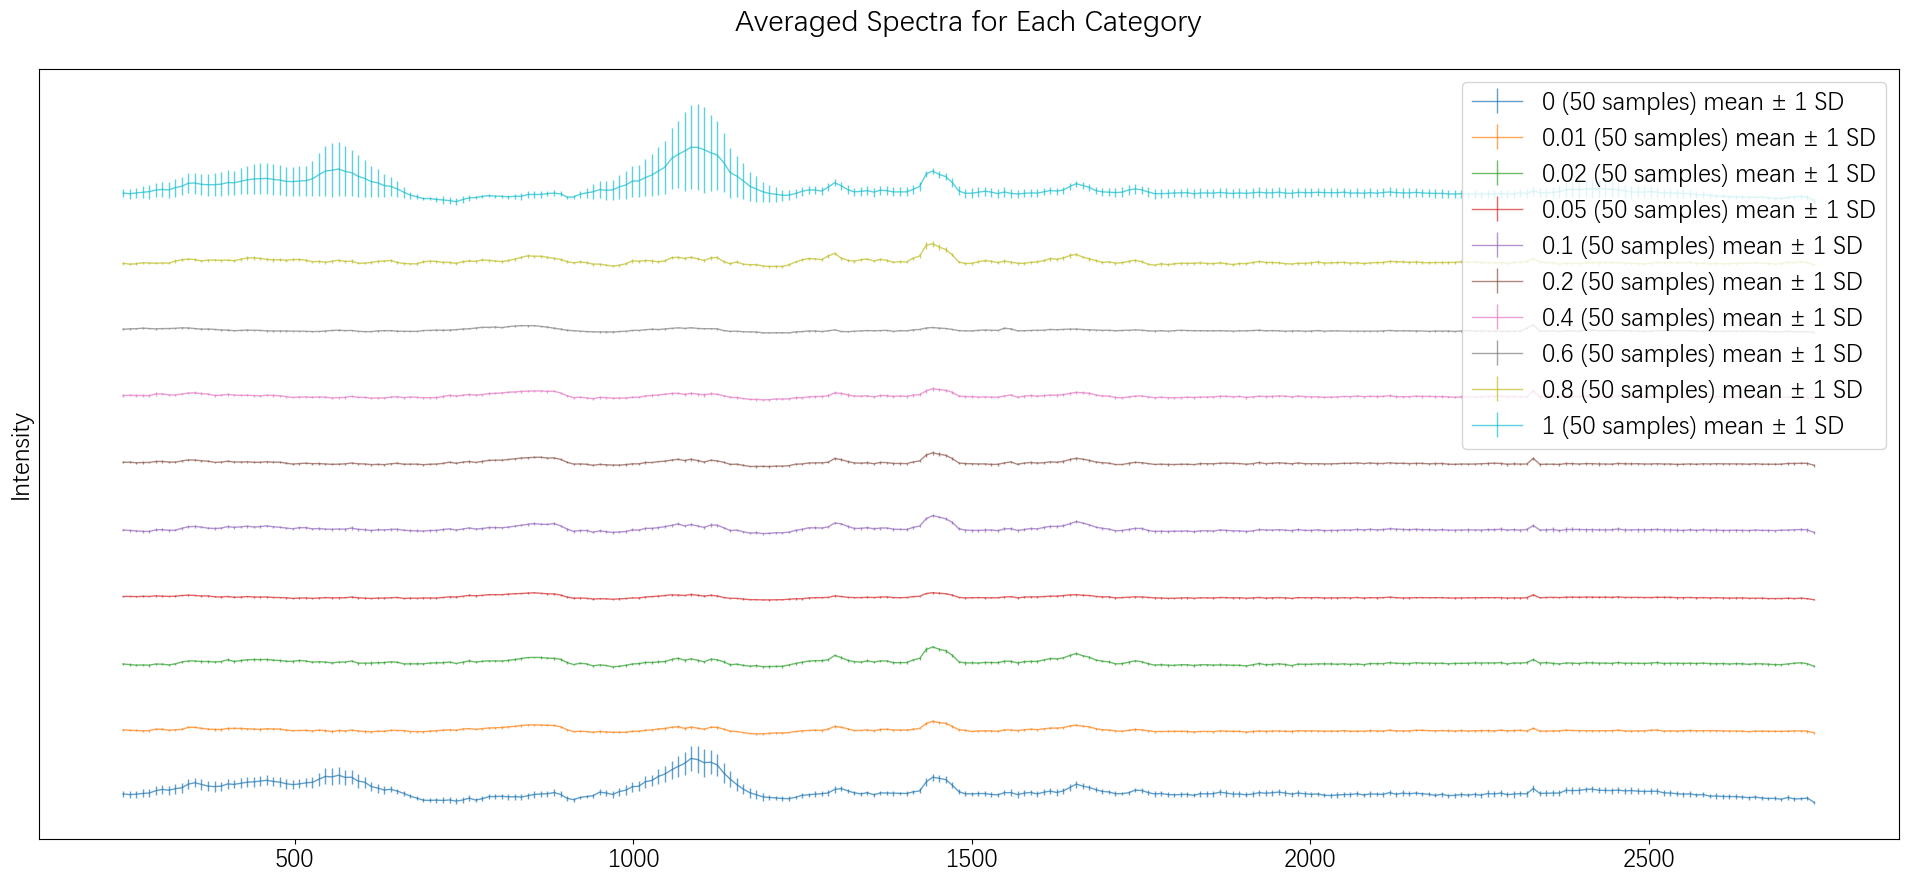

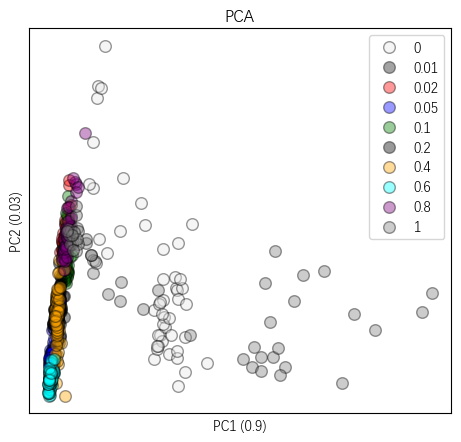

In [1]:
from qsi import io
X, yc, X_names, _, labels = io.load_dataset('milk_adulteration', x_range = list(range(100,1400)), shift=800)

from qsi import pipeline
X, X_names = pipeline.preprocess_dataset(X, X_names, pres = [('max', 0.2),('baseline_removal', (1e7, 1e-2))])
io.draw_class_average(X, yc, X_names, labels=labels, SD=1, shift=800)
_ = io.scatter_plot(X, yc, labels=labels)

## Classification

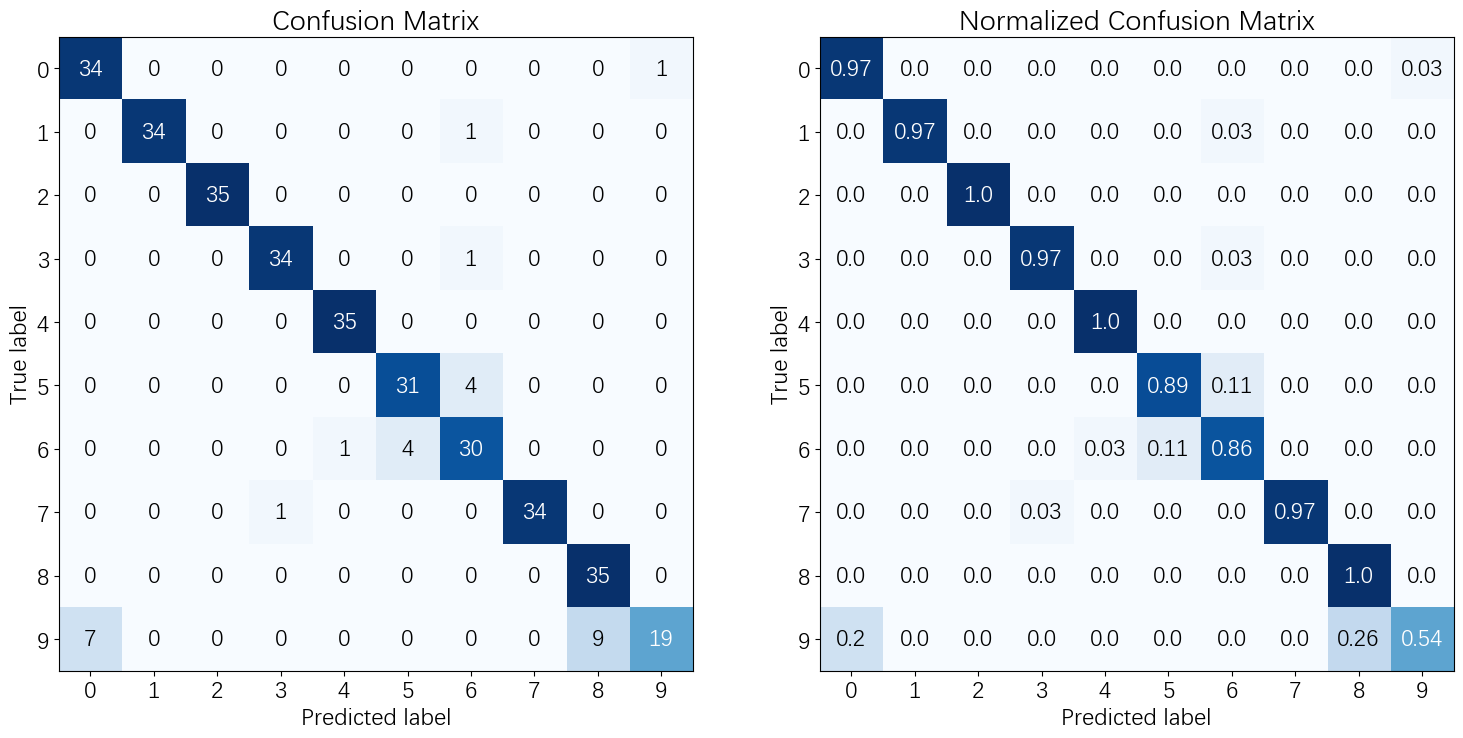

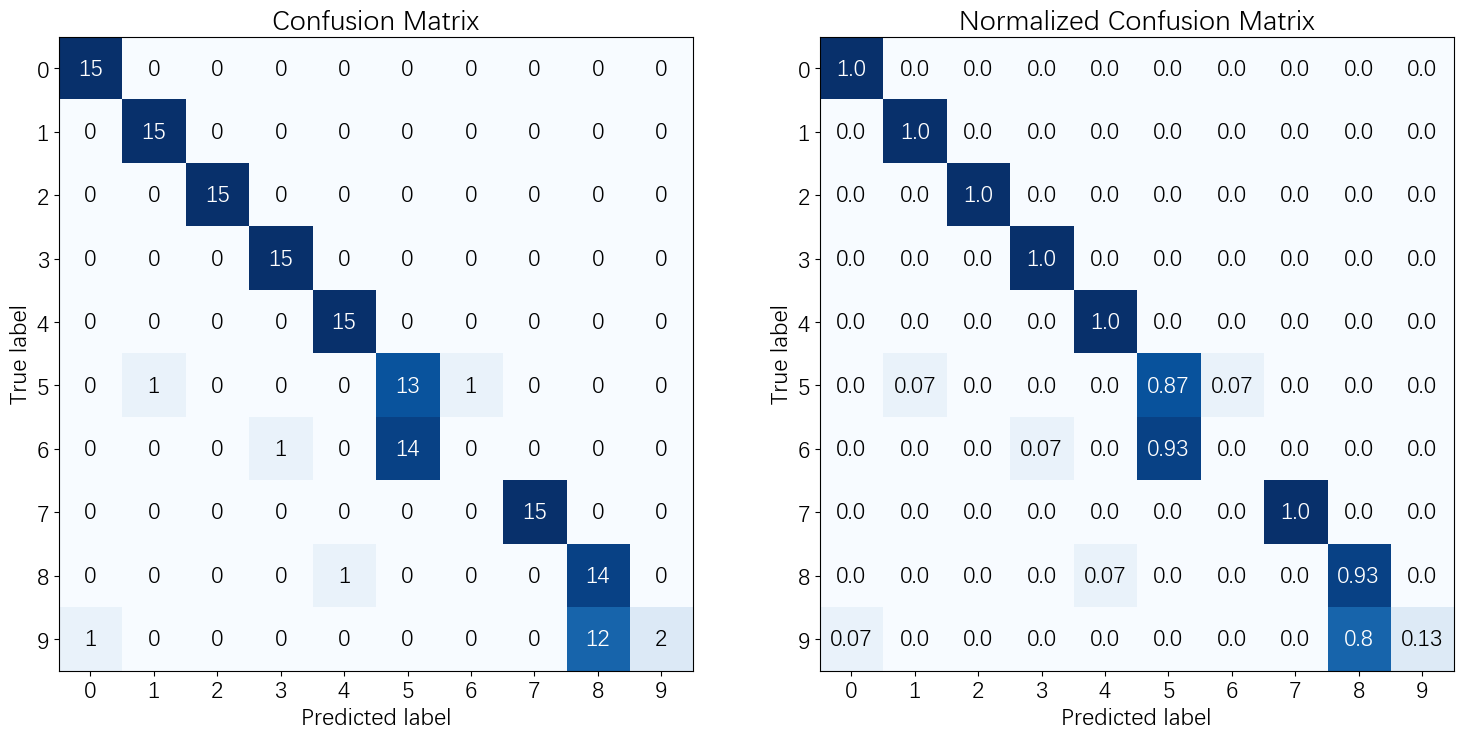

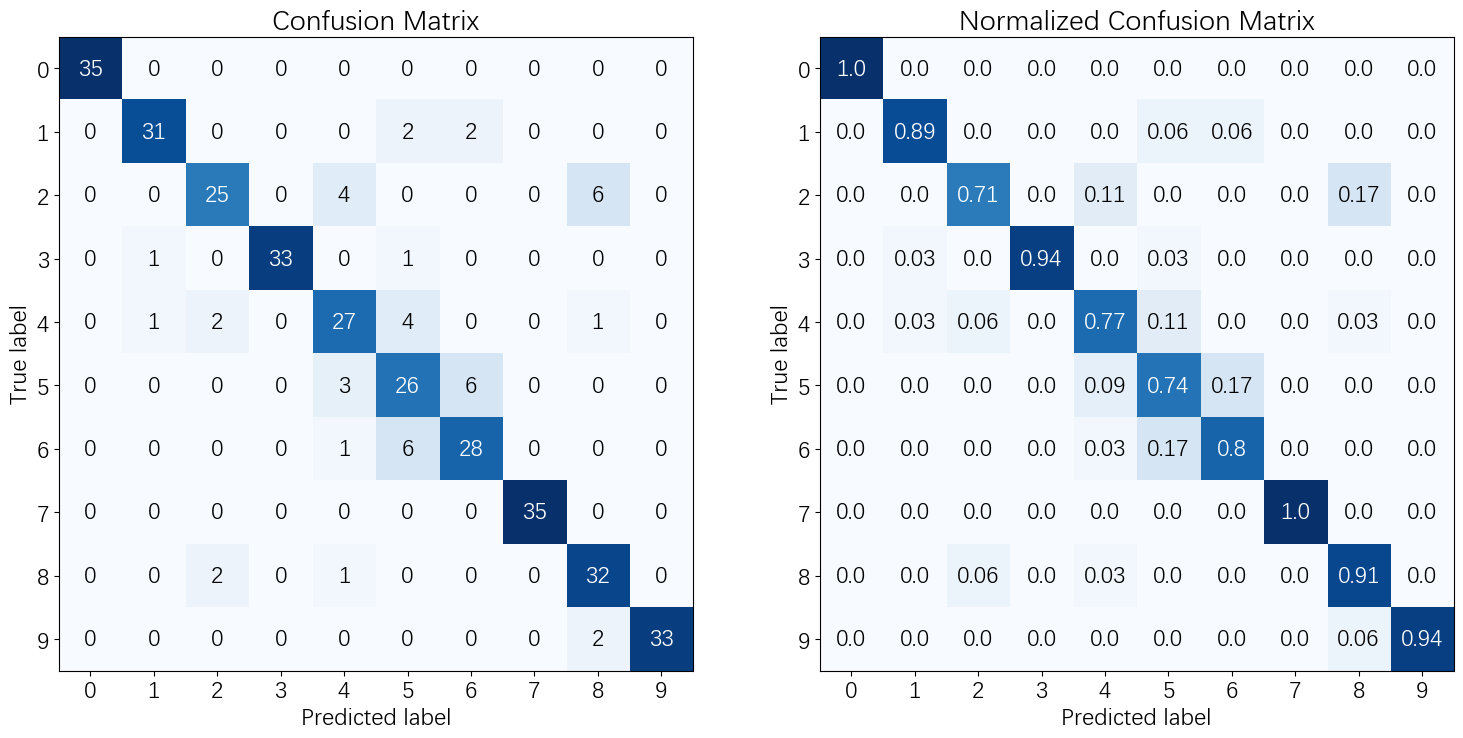

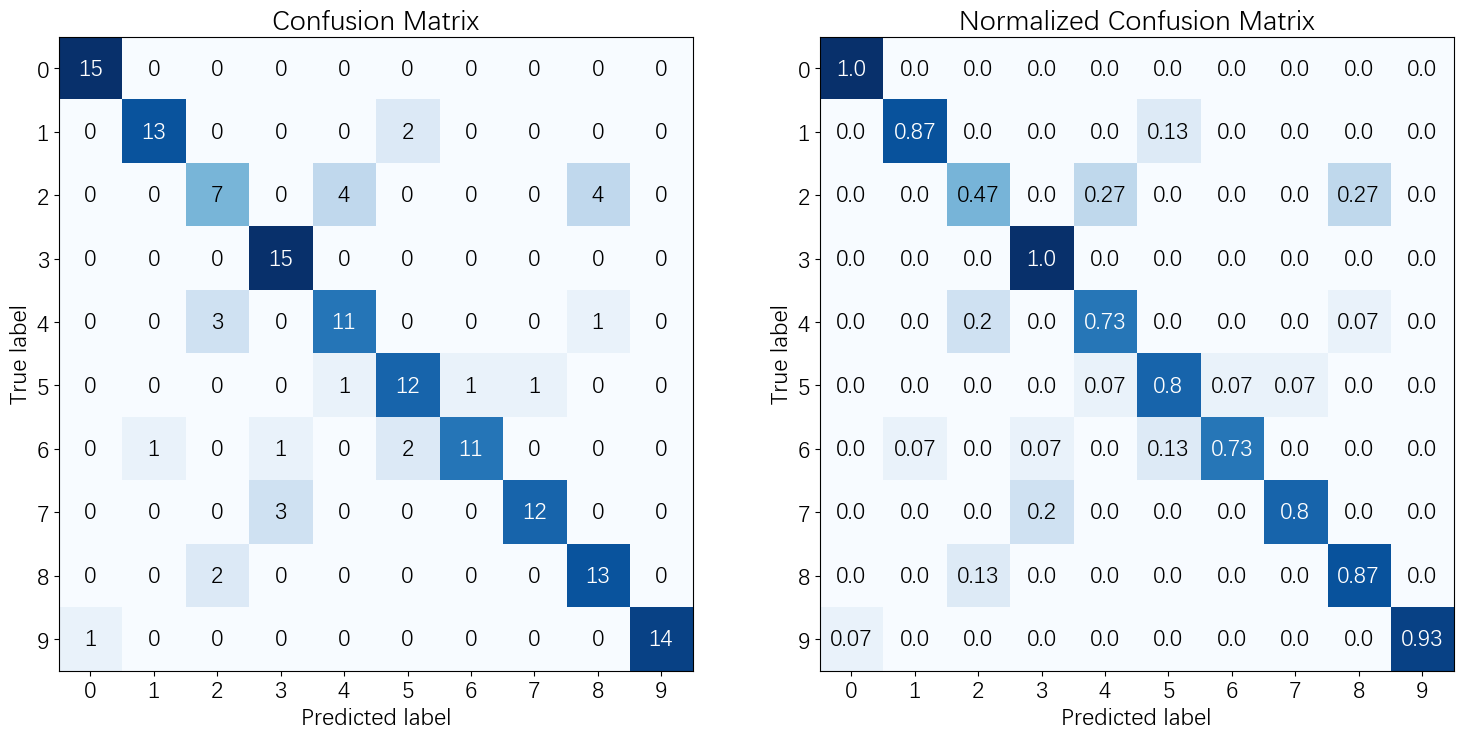

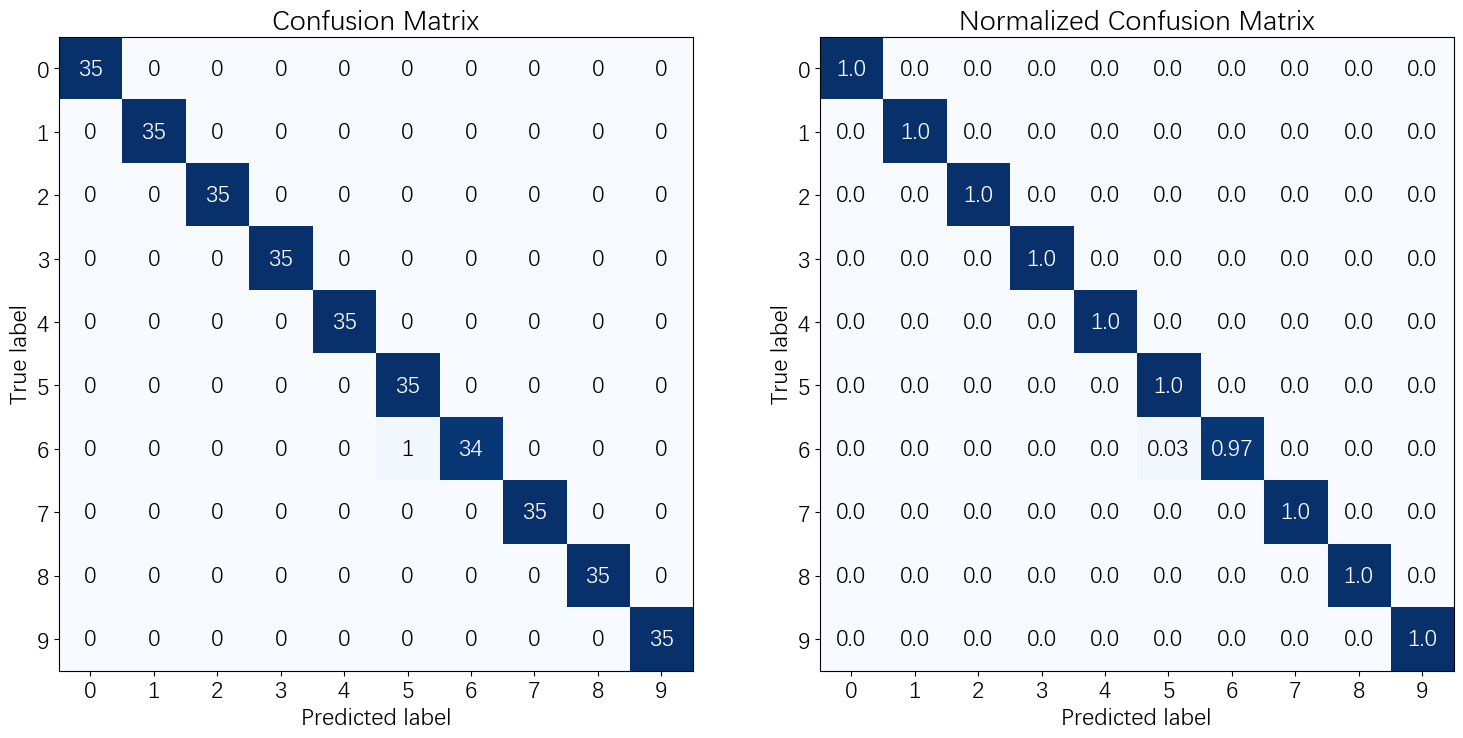

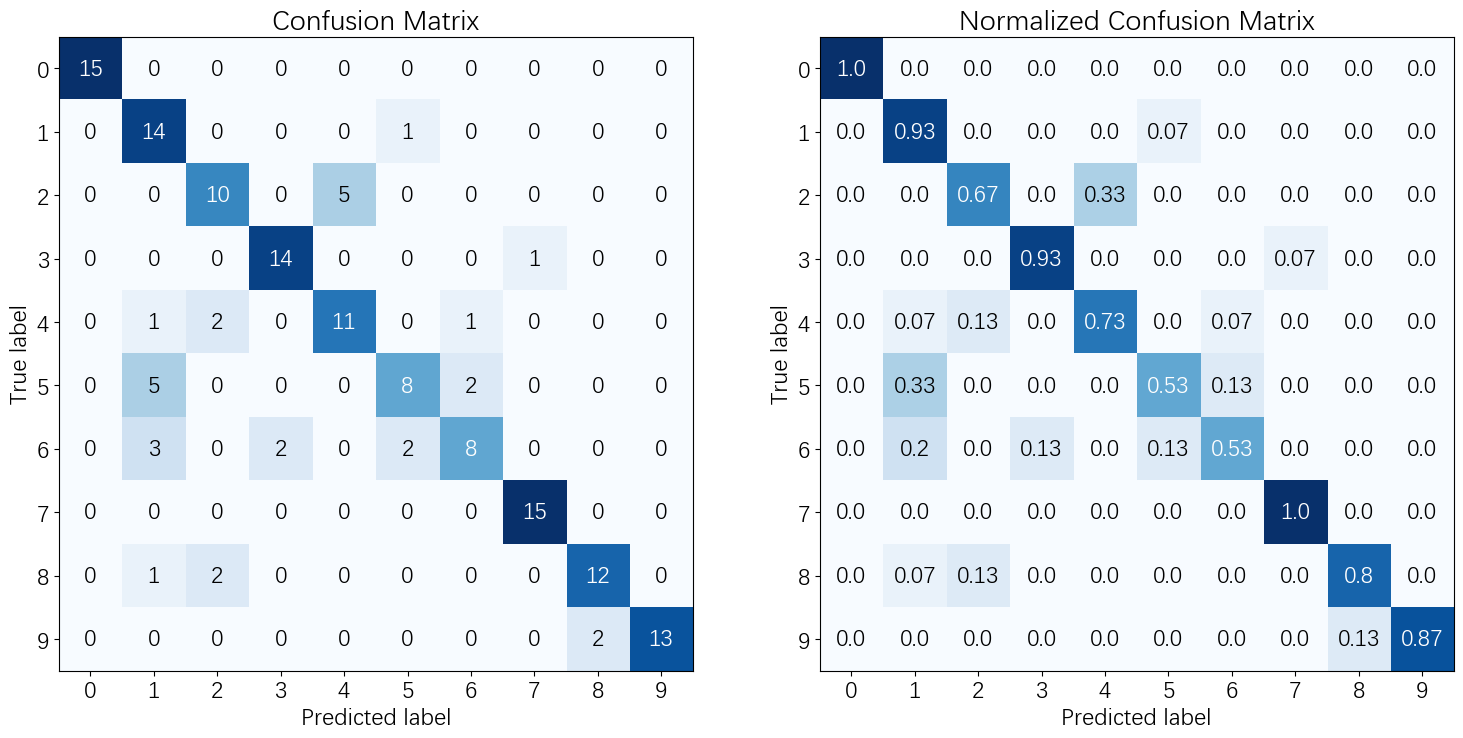

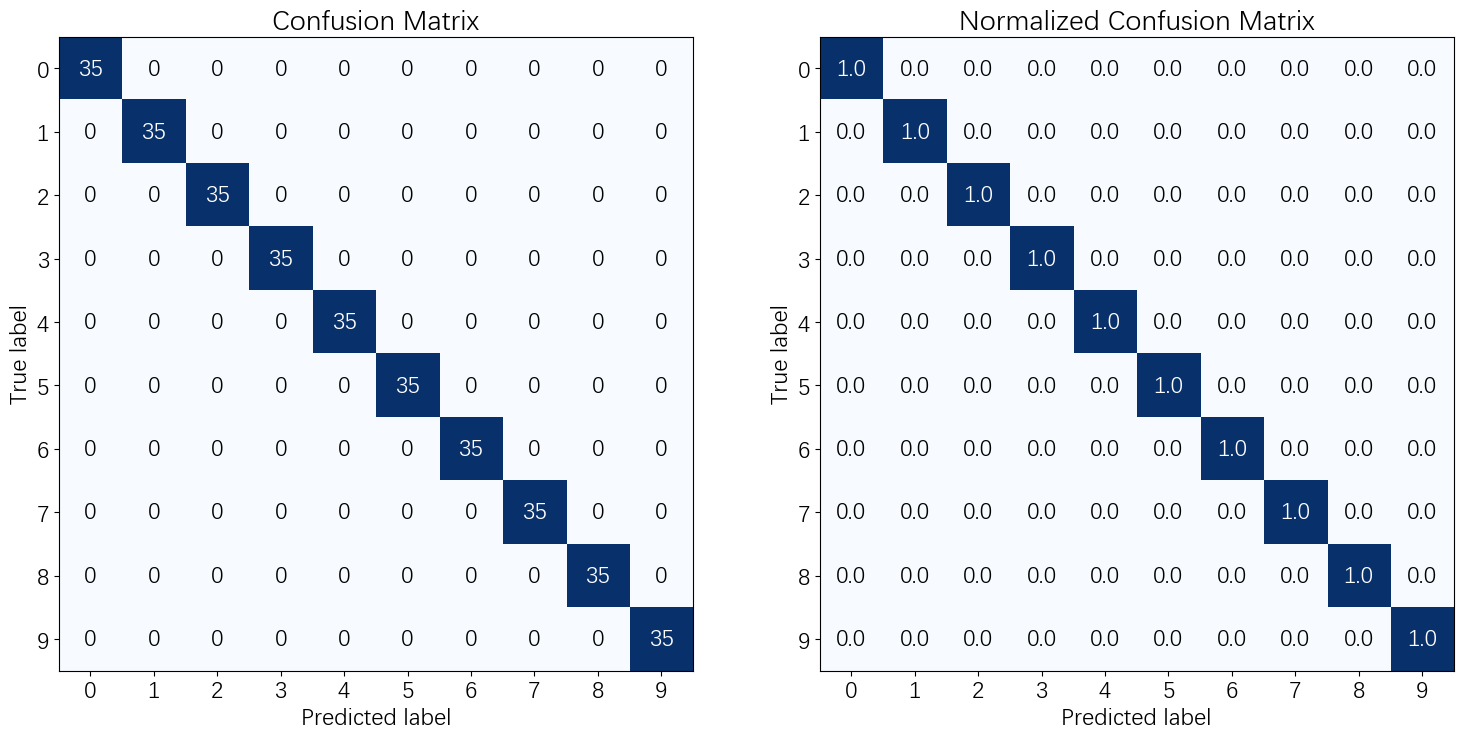

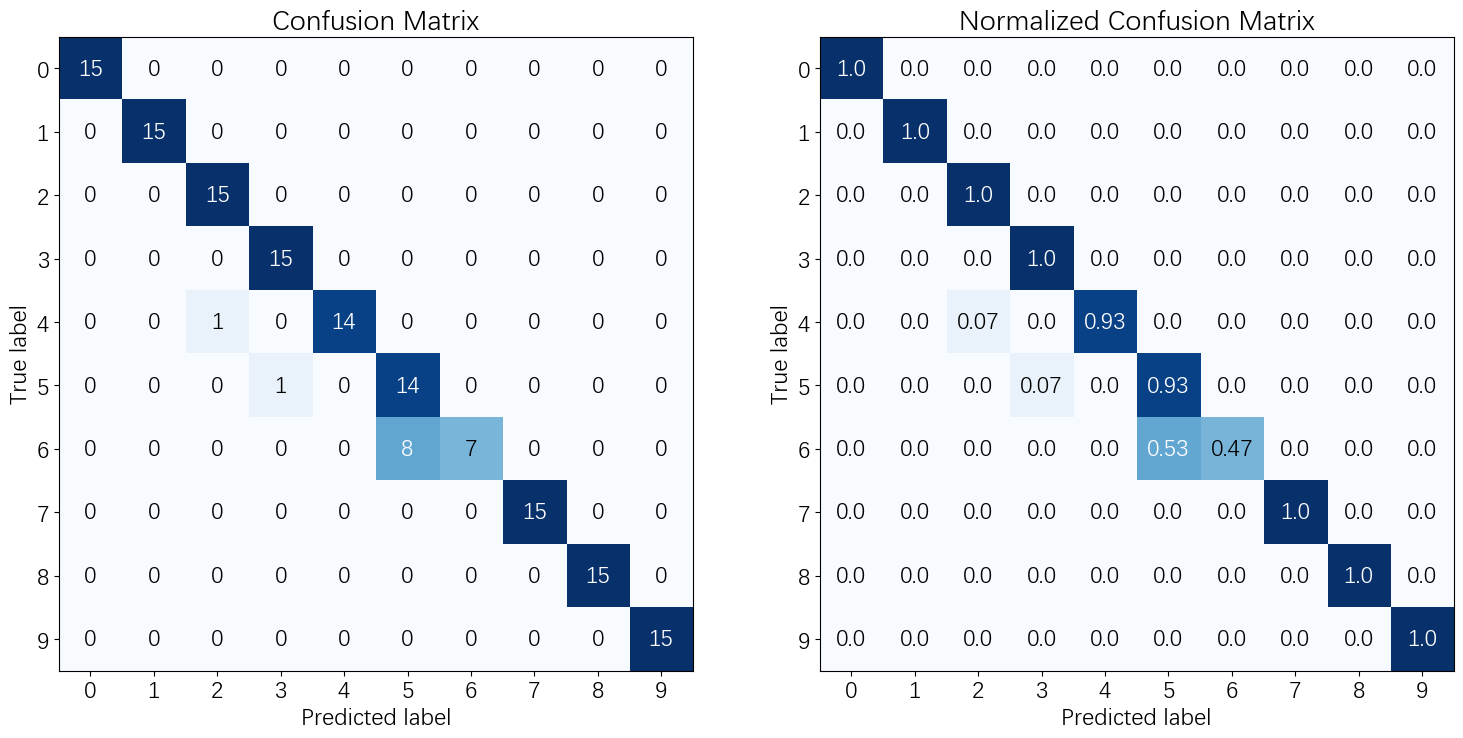

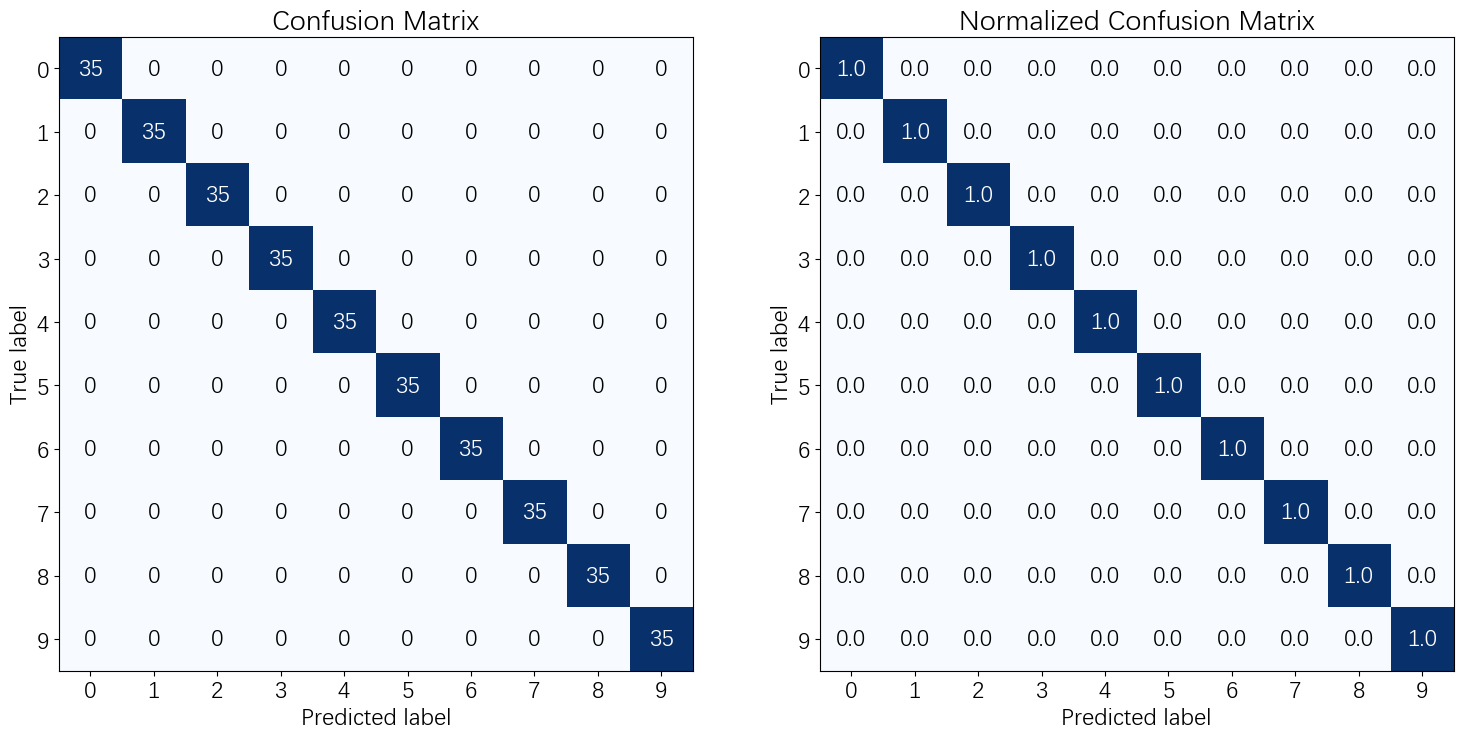

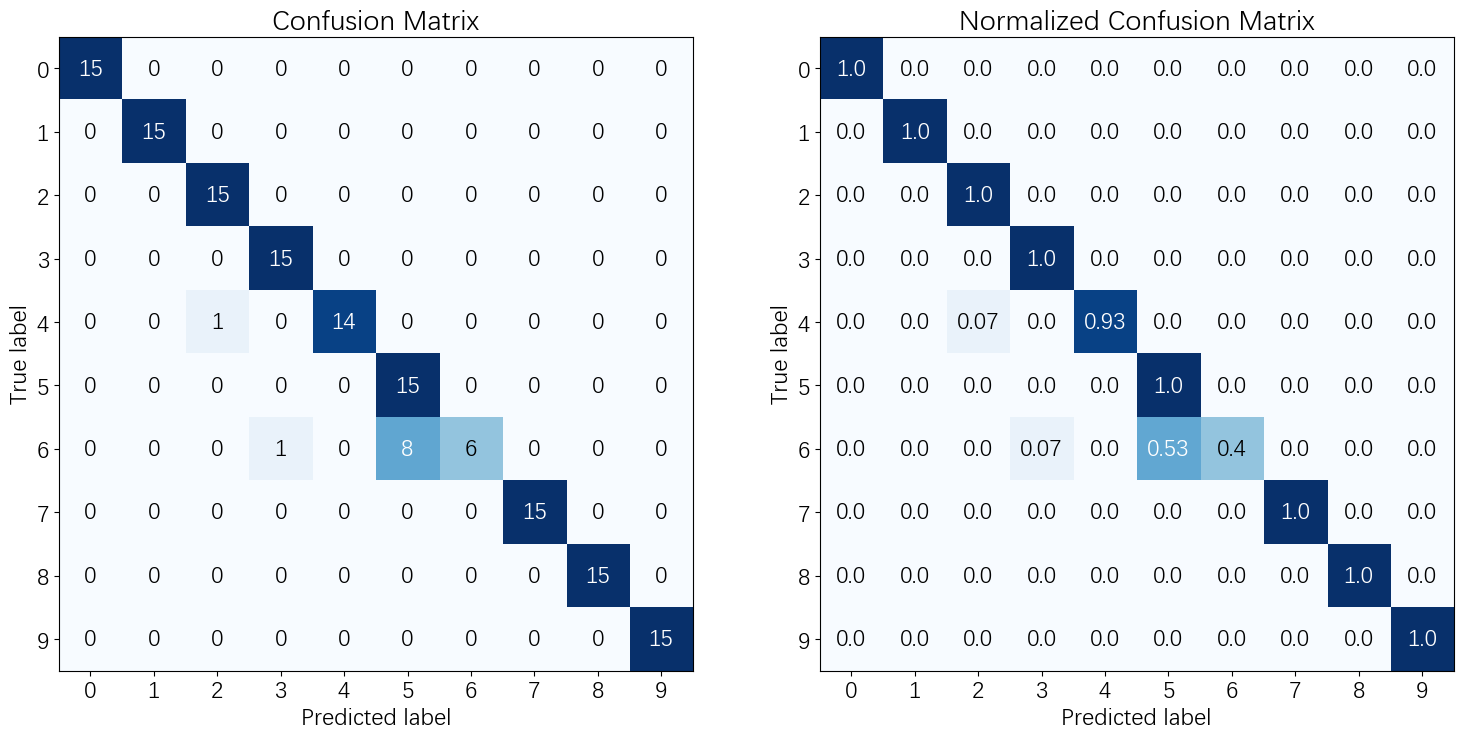

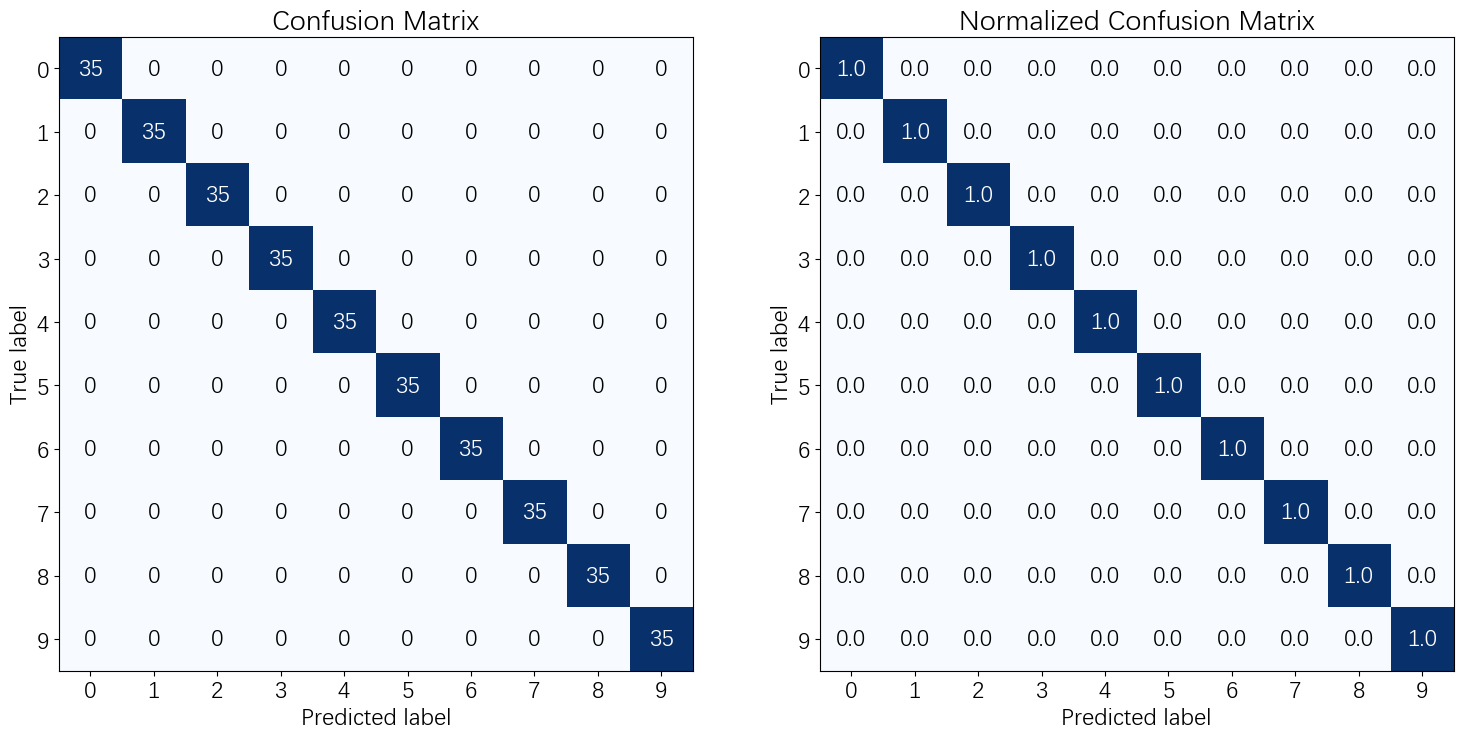

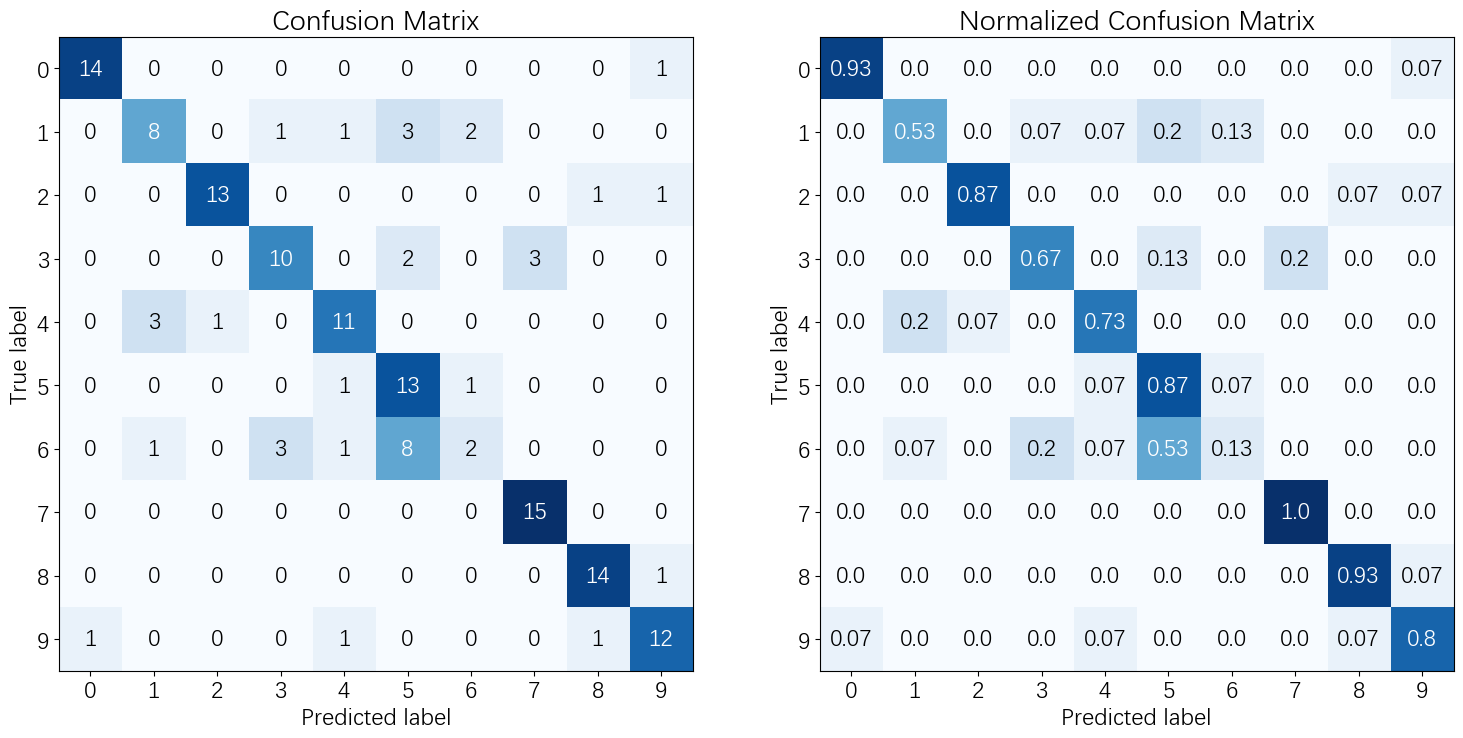

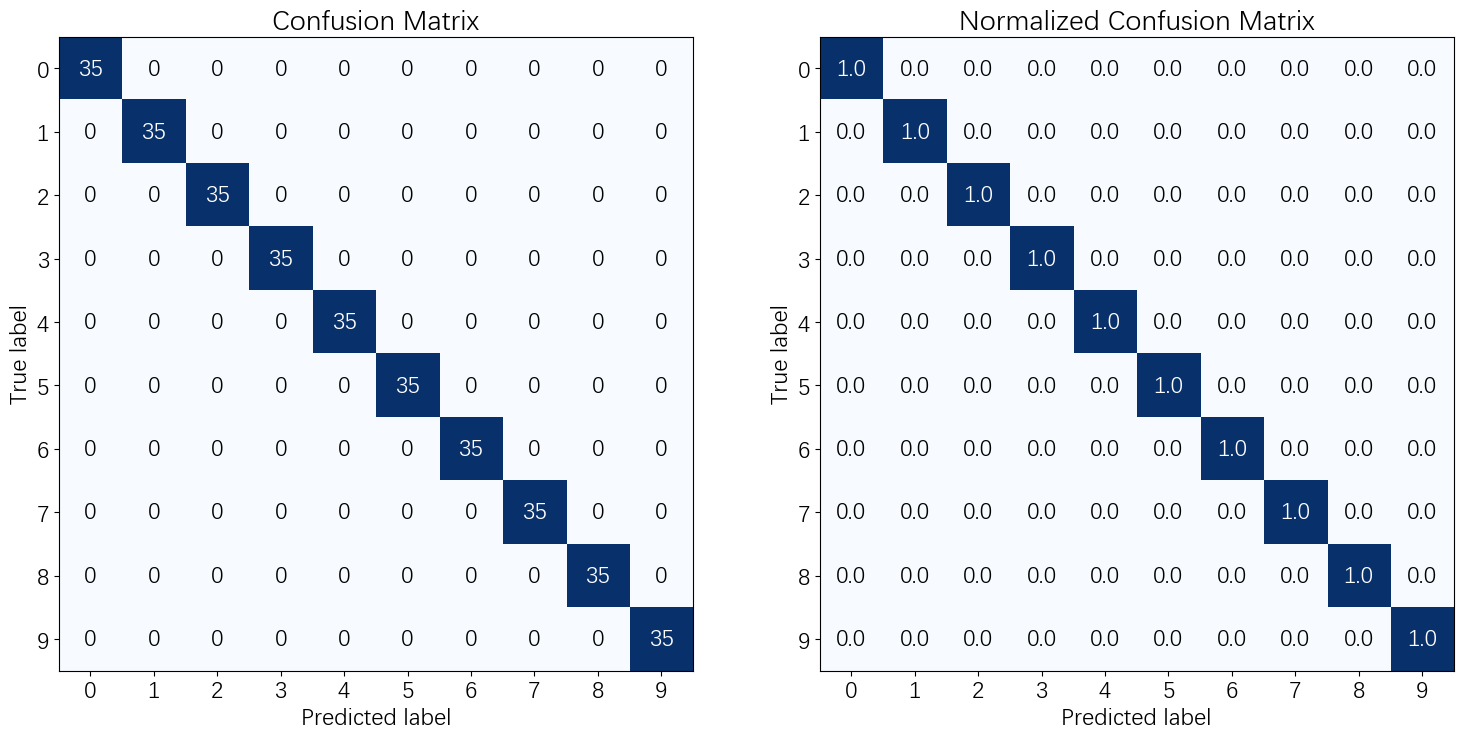

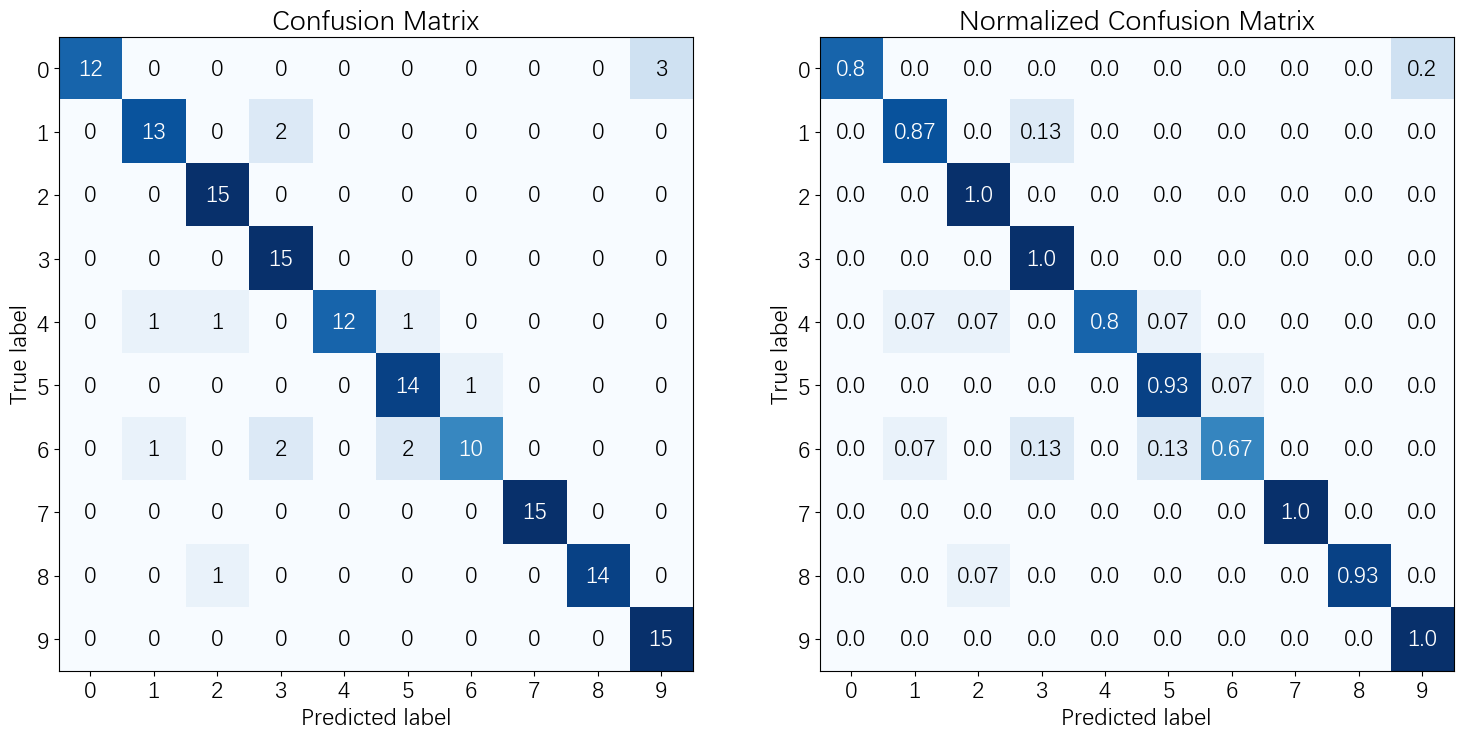

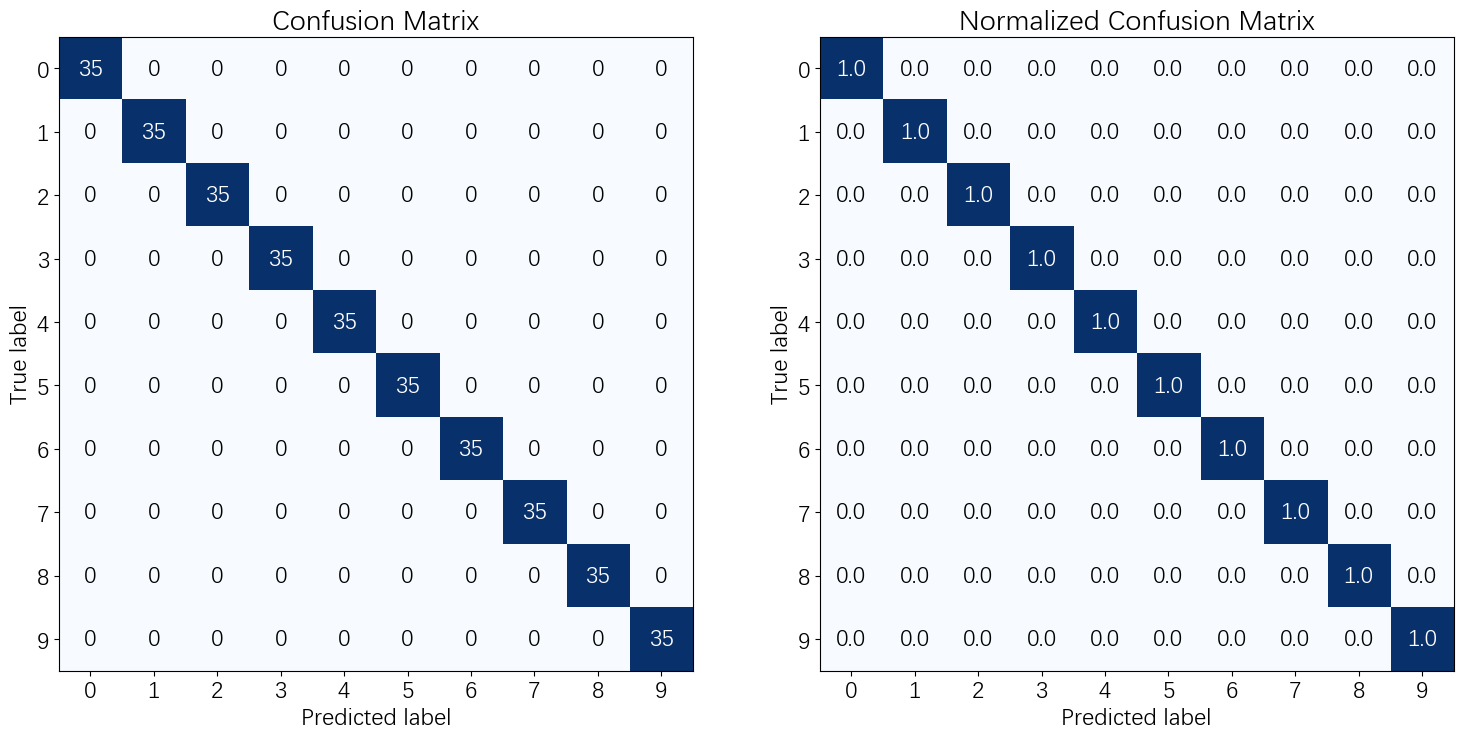

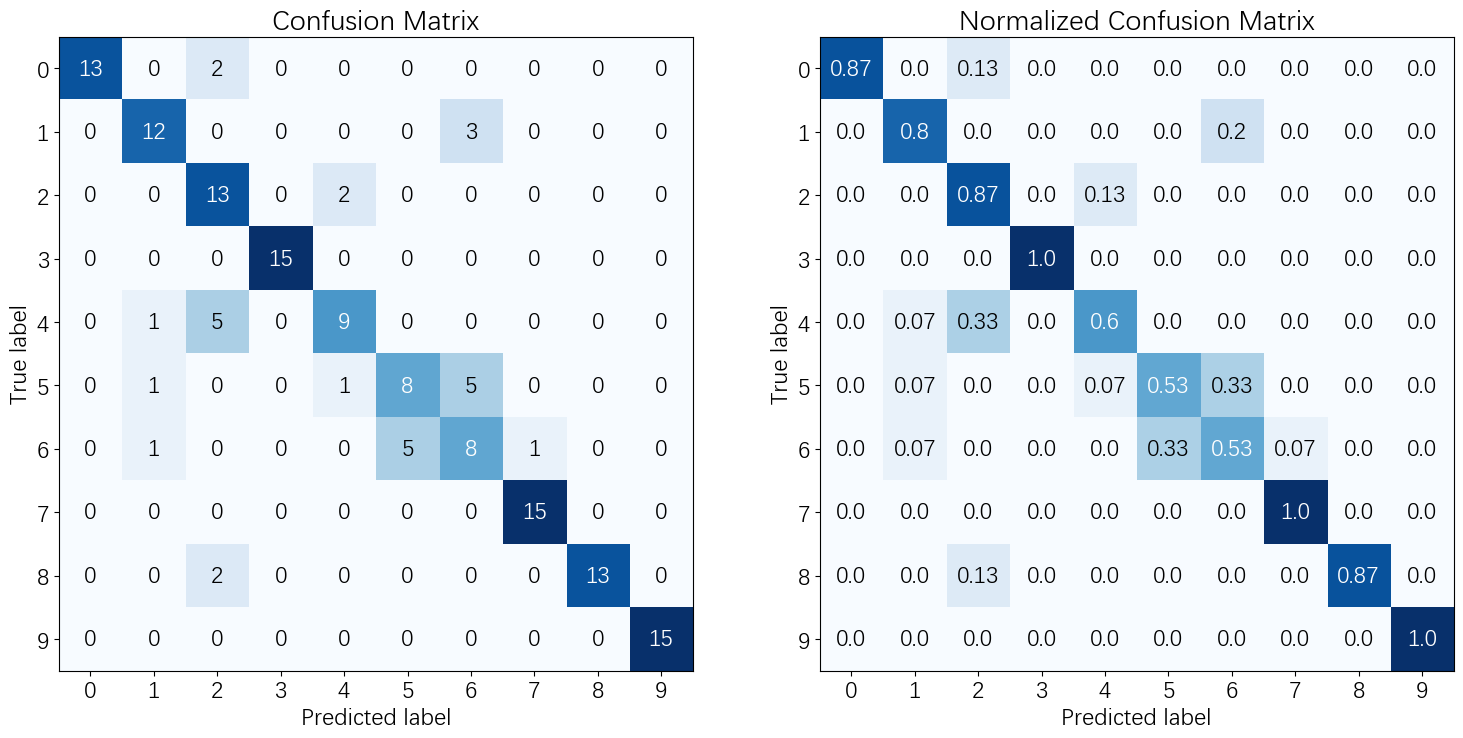

In [2]:
from qsi.cla import run_multiclass_clfs
dic_train_accs, dic_test_accs, html_str = run_multiclass_clfs(X, yc, clfs = 'all', split = .3, split_type = 'ks', cv_seed = 0, show = True)

In [3]:
from qsi.cla import visualize_multiclass_result
_ = visualize_multiclass_result(dic_train_accs, dic_test_accs)

classifier with optimal hparams,train accuracy*,test accuracy*
GaussianNB(),[0.917 0.974 0.983],[0.793 0.927 0.967]
DecisionTreeClassifier(max_depth=5),[0.871 0.989 1. ],[0.82 0.94 0.98]
RandomForestClassifier(n_estimators=8),[0.997 1. 1. ],[0.8 0.987 1. ]
"LinearSVC(C=0.01, multi_class='crammer_singer')",[1. 1. 1.],[0.933 0.933 0.987]
"LogisticRegressionCV(max_iter=1000, multi_class='multinomial')",[1. 1. 1.],[0.933 1. 1. ]
"MLPClassifier(alpha=1, hidden_layer_sizes=(61,))",[1. 1. 1.],[0.747 0.973 0.98 ]
KNeighborsClassifier(n_neighbors=1),[1. 1. 1.],[0.9 0.907 0.947]
LinearDiscriminantAnalysis(),[1. 1. 1.],[0.807 0.98 0.993]


## Regression

In [2]:
import numpy as np
y = np.asfarray(np.array(labels)[yc]) # convert class label to continuous value

In [3]:
from qsi.io.pre import kennardstone_split
idx_train, idx_test = kennardstone_split(X, 0.2)
X[idx_train].shape, X[idx_test].shape

((400, 260), (100, 260))

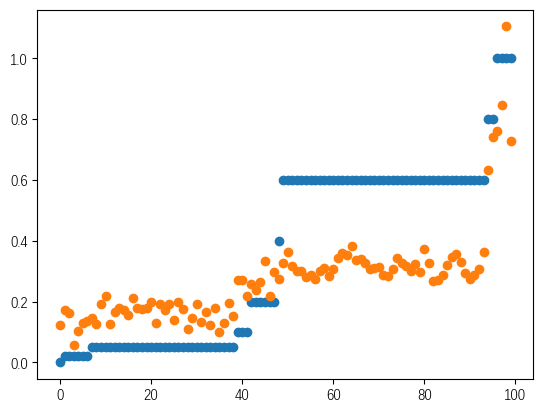

In [10]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

svr = SVR(kernel = 'rbf') # (kernel="poly", C=100, gamma="auto", degree=2, epsilon=0.1, coef0=1) # (kernel="rbf", C=100, gamma=0.1, epsilon=0.1) 
yp = svr.fit(X[idx_train], y[idx_train]).predict(X[idx_test])
plt.scatter(range(len(y[idx_test])), y[idx_test])
plt.scatter(range(len(yp)), yp)
plt.show()